# 단순 수익률 
자산에 대해 집계한다. 포트폴리오의 단순 수익률은 포트폴리오 내개별 자산 수익률의 가중화 합산이다. 단순 수익률은 다음과 같이 정의된다.\
r_t = (P_t/P_t-1)/P_t-1 = P_t / P_t-1
# 로그 수익률
시간에 대해 집계한다. 예를 보면 이해가 쉽다. 주어진 달의 로그 수익률이란 그 달의 일중 수익률 로그의 합산이다. 로그 수익률은 다음과 같이 정의된다. \
r_t = log(P_t/P_t-1) = log(P_t) - log(P_t-1)

 

In [1]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

# 데이터를 가지고와서 종가만 남기기
df = fdr.DataReader('005930', '2022-06-01', '2023-10-31')
df = df[["Close"]]
df

,Close
Date,
2022-06-02,66700
2022-06-03,66800
2022-06-07,65500
2022-06-08,65300
2022-06-09,65200
...,...
2023-10-25,68000
2023-10-26,66700
2023-10-27,67300


In [2]:
# 종가에 의한 단순 수익률과 로그 수익률 계산하기
df["simple_rtn"] = df["Close"].pct_change()
df['log_rtn'] = np.log(df["Close"]/df["Close"].shift(1))

In [3]:
# 결과확인
df

,Close,simple_rtn,log_rtn
Date,,,
2022-06-02,66700,NaN,NaN
2022-06-03,66800,0.001499,0.001498
2022-06-07,65500,-0.019461,-0.019653
2022-06-08,65300,-0.003053,-0.003058
2022-06-09,65200,-0.001531,-0.001533
...,...,...,...
2023-10-25,68000,-0.007299,-0.007326
2023-10-26,66700,-0.019118,-0.019303
2023-10-27,67300,0.008996,0.008955


# 빈도변경
### - 로그 수익률에 시간 주기 개수를 곱하거나 나눈다.
### - 변동성에 시간 주기 개수의 제곱근을 곱하거나 나눈다.

In [4]:
# 실현 변동성을 계산하는 함수
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [5]:
# 실현변동성 계산
df_rv = df.groupby(pd.Grouper(freq='M')).apply(realized_volatility)
df_rv.rename(columns={'log_rtn': 'rv'}, inplace=True)

In [6]:
# 값 연환산하기
df_rv.rv = df_rv.rv*np.sqrt(12)

,Close,simple_rtn,rv
Date,,,
2022-06-30,273740.990719,0.064754,0.226246
2022-07-31,273031.847959,0.076605,0.262110
2022-08-31,282739.951192,0.054192,0.188128
2022-09-30,248739.240973,0.072389,0.250044
2022-10-31,247267.082322,0.085158,0.292783
2022-11-30,286583.949306,0.074956,0.257970
2022-12-31,270827.048132,0.071342,0.249172
2023-01-31,270953.796799,0.077903,0.268291
2023-02-28,278735.896504,0.067665,0.234745


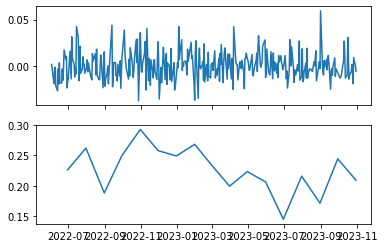

In [7]:
# 결과값 도식화
import matplotlib.pyplot as plt

fig, ax= plt.subplots(2,1, sharex=True)
ax[0].plot(df.log_rtn)
ax[1].plot(df_rv.rv)
df_rv